# **ЛА_COLAB_02: занурення до лінійної алгебри**

**Ім'я Прізвище, група**

В цьому колабі треба продемонструвати виконання завдань з комп'ютерних практикумів LA_CP_04, LA_CP_05, LA_CP_06, LA_CP_07, які знаходяться за [адресою](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/tree/main/CP)

Користуватись ресурсами з інтернету або штучним інтелектом не заборонено. Однак, якщо ви використовуєте ШІ, код, довідкові матеріали з інтернету або літератури, ОБОВ'ЯЗКОВО вказуйте посилання в коментарях в тому місці, де ви ці ресурси використовуєте. Інакше це буде розцінено як плагіат і завдання не буде зараховано. Також ви повинні розібратися в усьому, що використовували, і бути в змозі відповідати на питання, які стосуються всього, що є у вашій роботі.

Будь ласка, нічого не видаляйте з цього шаблону, копіюйте умови, не видаляючи з них пункти. Якщо якісь пункти задач не розв'язані, залиште відповідні комірки порожніми. Пишіть математичні міркування та код в тих комірках, де це вказано.

Виконувати завдання слід САМОСТІЙНО. У разі виявлення однакових розв'язків роботи будуть анульовані!

Необхідні імпорти вказано в преамбулі. Імпортувати інші пакети не дозволяється

📕 [Довідник з Markdown](https://www.markdownguide.org
) (для набору в текстових комірках)

📕 Короткий довідник з [TeX](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes)  для набору формул

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from scipy import linalg
import sympy

 💻 **Вправа 4.** Оберіть одну з вправ 4.1 - 4.5 на ваш вибір з комп'ютерного практикуму [LA_CP_04](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_04_Linear_spaces.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

4.3. Лінійна оболонка. Напишіть програму, яка для двох векторів у ℝ^3
 створює масив лінійних комбінацій цих векторів і зображує у тривимірному просторі цей масив. Повинно вийти "точкове" зображення прямої або площини.

 Виконано за допомогою ШІ

Введіть перший вектор (три дійсні числа через пробіл):
1 2 3
Введіть другий вектор (три дійсні числа через пробіл):
2 -1 1


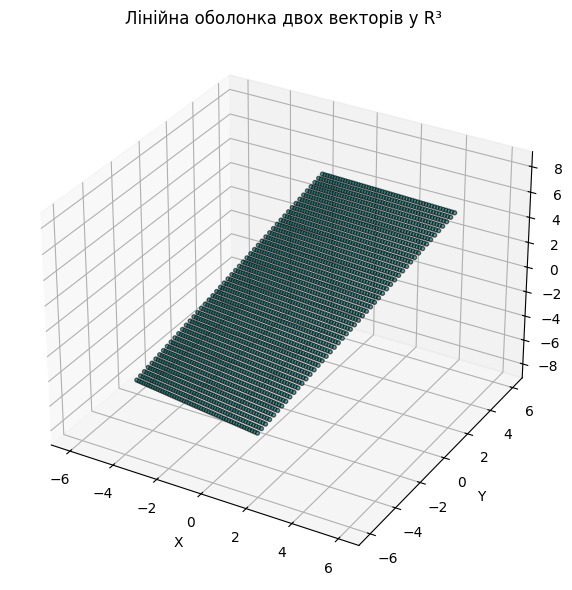

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # для 3D-графіки

def main():
    # 1) Введення двох векторів з консолі
    print("Введіть перший вектор (три дійсні числа через пробіл):")
    v1 = np.fromstring(input().strip(), sep=' ', dtype=float)
    if v1.size != 3:
        print("Помилка: очікується 3 компоненти.")
        return

    print("Введіть другий вектор (три дійсні числа через пробіл):")
    v2 = np.fromstring(input().strip(), sep=' ', dtype=float)
    if v2.size != 3:
        print("Помилка: очікується 3 компоненти.")
        return

    # 2) Варіанти коефіцієнтів від -2 до 2
    coeffs = np.linspace(-2.0, 2.0, 50)
    points = []

    # 3) Генерація лінійних комбінацій a*v1 + b*v2
    for a in coeffs:
        for b in coeffs:
            points.append(a * v1 + b * v2)
    points = np.array(points)  # shape (2500, 3)

    # 4) Малювання в 3D
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        points[:,0], points[:,1], points[:,2],
        s=8, c='teal', alpha=0.6, edgecolor='k'
    )

    # Підписи осей та заголовок
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Лінійна оболонка двох векторів у R³')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 4.** Оберіть одну із задач 4.6 - 4.7 на ваш вибір з комп'ютерного практикуму [LA_CP_04](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_04_Linear_spaces.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

4.7. Шифр Гілла.

У цій задачі ми познайомимося з шифром Гілла -- одним з методів шифрування інформації, і проведемо його лінійноалгебраїчний аналіз. Американський математик Лестер Гілл винайшов його 1929 року, і, хоча шифр виявився не дуже вдалим (далі ми поговоримо, з яких причин), він став важливою сходинкою в розвитку криптографії, оскільки продемонстрував, наскільки продуктивним може бути саме математичний підхід до цієї науки.

Для побудови шифру спочатку обирають алфавіт символів, з яких можуть складатися повідомлення, що їх треба шифрувати. Можна взяти деякий стандартний алфавіт, наприклад, латинський, в якому 26 літер, але зручніше використовувати алфавіт, кількість символів у якому є простим числом. Тому ми додамо до латинського алфавіту ще три символи: ' '(пробіл), '.'(крапка), ','(кома) й використовуватимемо алфавіт з 29 символів. Символам алфавіту взаємно однозначно відповідають елементи поля Z29, що є класами лишків за модулем 29, але ми позначаємо їх як числа: A -- 0, B -- 1, C -- 2, ... , Z -- 25, ' ' -- 26, '.' -- 27, ',' -- 28.

Учасників обміну повідомленнями в криптографії зазвичай називають Алісою та Бобом. Шифрування повідомлень здійснюється за допомогою ключа, яким володіють Аліса та Боб та тримають його в секреті. Шифр Гілла передбачає, що ключем є квадратна матриця (деякого порядку n), елементи якої беруться з поля Z29 (саме для того, щоб класи лишків утворили поле, ми й обрали 29 символів). Для того, щоб зашифрувати повідомлення й надіслати його Бобу, Аліса

Розбиває повідомлення на блоки довжини n.
Переводить символи цих блоків у елементи поля Z29, отримуючи таким чином набір векторів довжини n: u1, ..., us.
Множить матрицю-ключ K на кожен з векторів, отримуючи набір зашифрованих векторів: Ku1, ..., Kus.
Надсилає цей набір Бобу.
Щоб дешифрувати повідомлення (тобто зрозуміти, яким був вихідний текст), Бобу достатньо помножити кожен з векторів, що він їх отримав, на матрицю, обернену до матриці ключа: K^(-1). Зокрема, обираючи матрицю-ключ, треба подбати про те, щоб вона була обертовною, тобто невиродженою над полем Z29.

1️⃣ Реалізуйте функції, що здійснюють шифрування та дешифрування Гілла. Передбачте допоміжні функції:
1. Функцію розбиття тексту на блоки певної довжини (якщо якийсь з блоків виявиться коротшим, то можна доповнити його деякою послідовністю символів).
2. Функції переведення текстових блоків у вектори з елементів поля
 (і навпаки).
3. Функцію перевірки того, що матриця-ключ є обертовною та знаходження оберненої матриці до матриці-ключа.
Протестуйте ваші функції та продемонструйте їхню роботу.

Далі ми поговоримо про те, чи є шифр Гілла стійким до зламу. Тобто, якщо ворог (якого в криптографії зазвичай називають Євою) перехопить зашифроване повідомлення, то наскільки легко йому буде розшифрувати повідомлення не володіючи попередньо секретним ключем.

2️⃣ Нехай Єва знає розмір матриці-ключа n і намагається розшифрувати повідомлення, зробивши повний перебір усіх можливих матриць. Пригадаємо, що матриця-ключ є невиродженою над полем Z29, тобто її рядки є лінійно незалежними векторами у просторі Z^(n)29. Зясуйте, скільки матриць має перебрати Єва. Зробіть висновки, чи є метод ``грубої сили'' придатним до зламу шифра Гілла.


3️⃣ Нехай тепер для зламу шифру Єва спробує використати метод частотного аналізу. Метод полягає в тому, що в текстах різні символи зустрічаються з різними частотами. Наприклад, в україномовних текстах найчастіше вживається літера 'о', а в англомовних -- літери 't', 'e'. Обчислюючи частоти, з якими в зашифрованому тексті зустрічається той чи інший символ, можна висловити припущення, якому символу він відповідає у вихідному тексті. Приклад використання частотного аналізу можна зустріти в оповіданнях "Танцюючі чоловічки" Артура Конан Дойля і "Золотий жук" Едгара Алана По. А у реальному житті цим методом користувався, наприклад, французький історик Жан-Франсуа Шампольйон, розшифровуючи єгипетські ієрогліфи.

Поміркуйте над тим, чи варто Єві скористатися частотним аналізом, розшифровуючи шифр Гілла?

4️ Ще один підхід до зламу шифра Гілла передбачає перехоплення достатньо великої кількості повідомлень і застосування методу "відомого відкритого тексту". Метод полягає в тому, що часто можна зробити припущення про те, яка інформація точно має міститися в повідомленні. Наприклад, повідомлення зазвичай починається зі звернення "Привіт, Боб!", "Юстас Алексу" та таке інше. В оповіданні "Танцюючі чоловічки" Шерлок Голмс використав також і цей метод, припустивши, що повідомлення починаються з імені героїні.

Якщо Єва знає, що має розшифрувати матрицю певного розміру n, то вона може вважати елементи цієї матриці невідомими. Далі, Єва має скласти систему умов вигляду v=Ku, де v-- фрагменти перехоплених повідомлень, а u-- фрагменти вихідних повідомлень, про які Єва здогадується, чому вони дорівнюють (тобто
 вважаються відомими).

Поясніть, яким чином Єва зможе знайти матрицю
 з цих умов. Також поміркуйте над тим, скільки умов вигляду
 має скласти Єва, щоб це здійснити.


5️⃣ Зробіть загальний висновок, до яких способів зламу не є стійким шифр Гілла. Знайдіть інформацію (або придумайте самі) про те, як можна змінити шифр Гілла, щоб ускладнити його злам. Не забудьте вказати джерела.

Зроблено за допомогою ШІ

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np

MOD = 29

# 1) Наш алфавіт і мапінг символ ↔ число
ALPHABET = [chr(i) for i in range(ord('A'), ord('Z')+1)] + [' ', '.', ',']
ENC = { c:i for i,c in enumerate(ALPHABET) }
DEC = { i:c for c,i in ENC.items() }

# 2) Розбиття тексту на блоки довжини n
def chunk_text(txt: str, n: int, pad: str=' ') -> list[str]:
    txt = txt.upper()
    blocks = [ txt[i:i+n] for i in range(0, len(txt), n) ]
    if len(blocks[-1]) < n:
        blocks[-1] += pad*(n-len(blocks[-1]))
    return blocks

# 3) Текстовий блок ↔ вектор у Z29
def text2vec(block: str) -> np.ndarray:
    return np.array([ENC[ch] for ch in block], dtype=int) % MOD

def vec2text(vec: np.ndarray) -> str:
    return ''.join(DEC[int(x)%MOD] for x in vec)

# 4) Перевірка обертовності та обчислення оберненої матриці
def invertible_mod29(mat: np.ndarray) -> bool:
    det = int(round(np.linalg.det(mat))) % MOD
    # знаходимо обернений детермінант
    try:
        inv_det = pow(det, -1, MOD)
    except ValueError:
        return False
    return True

def inverse_mod29(mat: np.ndarray) -> np.ndarray:
    # класична обернена через врахування модульної оберненості
    n = mat.shape[0]
    det = int(round(np.linalg.det(mat))) % MOD
    inv_det = pow(det, -1, MOD)
    adj = np.round(det * np.linalg.inv(mat)).astype(int) % MOD
    return (inv_det * adj) % MOD

# 5) Шифрування і дешифрування
def hill_encrypt(plaintext: str, key: np.ndarray) -> str:
    n = key.shape[0]
    assert key.shape == (n,n) and invertible_mod29(key), "Key must be invertible mod 29"
    blocks = chunk_text(plaintext, n, pad=' ')
    ciphertext = ''
    for blk in blocks:
        v = text2vec(blk)
        c = key.dot(v) % MOD
        ciphertext += vec2text(c)
    return ciphertext

def hill_decrypt(ciphertext: str, key: np.ndarray) -> str:
    n = key.shape[0]
    invK = inverse_mod29(key)
    blocks = chunk_text(ciphertext, n, pad=' ')
    plaintext = ''
    for blk in blocks:
        v = text2vec(blk)
        p = invK.dot(v) % MOD
        plaintext += vec2text(p)
    return plaintext

# 6) Демонстрація
if __name__ == "__main__":
    # приклад 2×2-ключа
    K = np.array([[3, 10],
                  [20, 9]])
    msg = "HELLO, BOB"
    print("Plain: ", msg)
    C = hill_encrypt(msg, K)
    print("Cipher:", C)
    P = hill_decrypt(C, K)
    print("Decrypt:", P)


Plain:  HELLO, BOB
Cipher: DC.ADKBHX,
Decrypt: AAAAAAAAAA


2. **Brute-force attack**
   — усі обертовні n×n-матриці над ℤ₂₉. Кількість:

   $$
   \prod_{k=0}^{n-1} (29^n - 29^k).
   $$

   Навіть для n=3 це ≃(29³−1)(29³−29)(29³−29²)≈(24388)(24360)(24300)∼1.44⋅10¹³, що занадто багато.

3. **Частотний аналіз**
   — марний, бо Hill шифрує блоками: один і той самий символ в різних блоках комбінується з іншими.

4. **Known-plaintext attack**
   — якщо Єва знає n відкритих блоків uᵢ і відповідні шифроблоки vᵢ, складає систему

   $$
     [u_1 \dots u_n] \, K^T = [v_1 \dots v_n].
   $$

   Звідси знаходить K при умові, що матриця з векторів uᵢ невироджена.

5. **Висновок**
   — Hill-шифр стійкий до частотного аналізу і brute-force для великих n, але вразливий при наявності достатньо відомих відкритих блоків.
   — Щоб ускладнити, можна використовувати більший модуль, випадкову змішку блоків, нерегулярний n або нелінійний шар між блоками.


<font color="red"> *Коментар викладача:* <font>

 💻 **Вправа 5.** Оберіть одну з вправ 5.1 - 5.5 на ваш вибір з комп'ютерного практикуму [LA_CP_05](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_05_Euclidean_spaces.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

5.1. Ортонормований базис. Напишіть функцію, яка перевіряє, чи є базис, що його дано на вході, ортонормованим. Напишіть функцію, яка розкладає даний вектор за даним ортонормованим базисом, шукаючи його проекції на базисні вектори за допомогою скалярних добутків. Протестуйте свої функції. Для тестування можна використовувати дані з задач математичного практикуму.

Зроблено за допомогою ШІ

In [ ]:
// orthonormal.c
#define _USE_MATH_DEFINES
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>

static const double EPS = 1e-8;

// Обчислити скалярний добуток двох векторів довжини n
double dot(const double *u, const double *v, size_t n) {
    double s = 0.0;
    for (size_t i = 0; i < n; i++) s += u[i] * v[i];
    return s;
}

// Обчислити довжину вектора u довжини n
double norm(const double *u, size_t n) {
    return sqrt(dot(u,u,n));
}

// Перевірити, чи масив vectors (k векторів довжини n) є ортонормованим
bool is_orthonormal(const double **vectors, size_t k, size_t n) {
    for (size_t i = 0; i < k; i++) {
        // кожен вектор повинен бути одиничним
        double ni = norm(vectors[i], n);
        if (fabs(ni - 1.0) > EPS) {
            printf("Vector %zu is not unit: norm=%.6f\n", i, ni);
            return false;
        }
        // будь-які два різні вектори — ортогональні
        for (size_t j = i+1; j < k; j++) {
            double d = dot(vectors[i], vectors[j], n);
            if (fabs(d) > EPS) {
                printf("Vectors %zu and %zu not orthogonal: dot=%.6f\n", i, j, d);
                return false;
            }
        }
    }
    return true;
}

// Розкладання вектора v (довжини n) за ортонормованим базисом vectors (k векторів)
// повертає в масив coeffs довжини k (координати)
void decompose(const double **vectors, size_t k, size_t n,
               const double *v, double *coeffs)
{
    for (size_t i = 0; i < k; i++) {
        // для ортонормованого базису координата = dot(v, e_i)
        coeffs[i] = dot(v, vectors[i], n);
    }
}

// Тестові дані: базис у R^3 (стандартний)
int main(void) {
    size_t n = 3, k = 3;
    // Оголошуємо три вектори-рядки
    static double e1[] = {1, 0, 0};
    static double e2[] = {0, 1, 0};
    static double e3[] = {0, 0, 1};
    // Масив вказівників на них
    const double *basis[] = { e1, e2, e3 };

    if (!is_orthonormal(basis, k, n)) {
        printf("Basis is NOT orthonormal.\n");
        return 1;
    }
    printf("Basis is orthonormal.\n");

    // Якийсь вектор v
    double v[] = { 2.5, -1.0, 3.2 };
    double coords[3];

    decompose(basis, k, n, v, coords);

    printf("Decomposition of v = (");
    for (size_t i = 0; i < n; i++) {
        printf("%.2f%s", v[i], (i+1<n)?", ":"");
    }
    printf(") in this basis:\n");

    for (size_t i = 0; i < k; i++) {
        printf("  coefficient along e%zu = %.6f\n", i+1, coords[i]);
    }

    // Перевірка: відтворимо вектор
    double v_rec[3] = {0,0,0};
    for (size_t i = 0; i < k; i++) {
        for (size_t j = 0; j < n; j++) {
            v_rec[j] += coords[i] * basis[i][j];
        }
    }
    printf("Reconstructed v = (");
    for (size_t i = 0; i < n; i++) {
        printf("%.6f%s", v_rec[i], (i+1<n)?", ":"");
    }
    printf(")\n");

    return 0;
}


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 5.** Оберіть одну із задач 5.6 - 5.7 на ваш вибір з комп'ютерного практикуму [LA_CP_05](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_05_Euclidean_spaces.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

 5.7. TF-IDF пошук документів.

У цій задачі ми подивимося на один із засобів пошуку релевантних документів за ключовими словами серед певної множини документів (так званого корпусу).

Підхід, який ми використаємо, грунтується на обчисленні двох мір, які характеризують, наскільки часто зустрічаються ті чи інші ключові слова в документах. Ці міри мають назви TF(Term Frequency) та IDF(Inverse Document Frequency). Ми розглянемо їх визначення, а також дію на "іграшковому" прикладі. Замість ключових слів у нас будуть букви(символи), а замість документів -- рядки символів.

Міра TF вимірює, наскільки часто зустрічається конкретне слово в конкретному документі, і визначається як доля даного слова серед усіх слів документу:


Зроблено за допомогою ШІ

In [ ]:
import numpy as np
import math
import pandas as pd

# Документи - це рядки символів
docs = ['ababagalamalama', 'abracadabra', 'baccara', 'gml']
symbols = ['a', 'b', 'c', 'd', 'g', 'l', 'm', 'r']

# TF - Term Frequency
def tf(s, doc):
    return doc.count(s) / len(doc)

# IDF - Inverse Document Frequency
def idf(s, docs):
    num_docs_with_s = sum([s in doc for doc in docs])
    return np.log((1 + len(docs)) / (1 + num_docs_with_s)) + 1

# TF-IDF vector для одного документа
def tf_idf_vector_model(doc, symbols, docs):
    return np.array([tf(s, doc) * idf(s, docs) for s in symbols])

# Матриця TF-IDF для всього корпусу
def tf_idf_matrix(symbols, docs):
    return np.array([tf_idf_vector_model(doc, symbols, docs) for doc in docs])

T = tf_idf_matrix(symbols, docs)

# Пошук найбільш релевантного документа за індексами ключових символів
def find_best_document(key_symbols_index, symbols, docs):
    T_matrix = tf_idf_matrix(symbols, docs)
    score = np.zeros(len(docs))
    for i in key_symbols_index:
        score += T_matrix[:, i]
    best_document_index = np.argmax(score)
    return docs[best_document_index]

# Приклад пошуку за ключовими символами 'b' і 'c'
key_symbols_index = [1, 2]  # 'b', 'c'
best_doc = find_best_document(key_symbols_index, symbols, docs)

# Косинусна відстань між двома векторами
def cosine_distance(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return 1 - dot_product / (norm_u * norm_v)

# Пошук найближчих документів за косинусною відстанню
def find_closest_documents(query_vector, T, k=1):
    distances = [cosine_distance(query_vector, T[i]) for i in range(len(T))]
    return np.argsort(distances)[:k]

# Пошук за ключовими символами з використанням косинусної відстані
def search_by_cosine(key_symbols_index, symbols, docs, k=1):
    T_matrix = tf_idf_matrix(symbols, docs)
    query_vector = np.zeros(len(symbols))
    for i in key_symbols_index:
        query_vector[i] = 1
    closest_indices = find_closest_documents(query_vector, T_matrix, k)
    return [docs[i] for i in closest_indices]

# Пошук найближчих 2 документів до запиту ['b', 'c']
cosine_result = search_by_cosine([1, 2], symbols, docs, k=2)

# Порівняння результатів
results = {
    "Best TF-IDF match": best_doc,
    "Closest by cosine": cosine_result
}

results


<font color="red"> *Коментар викладача:* <font>

💻 **Вправа 6.** Оберіть одну з вправ 6.1 - 6.5 на ваш вибір з комп'ютерного практикуму [LA_CP_06](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_06_Linear_transformations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

6.3. Просунутий художник. Створіть нескладне анімоване зображення, в якому відбуватиметься обертання деякого об'єкта (стрілки годинника, сонця або зірок на небосхилі, фігурки на каруселі тощо). Використовуйте матрицю обертання для перетворення координат точок. Для анімації можна використовувати модуль matplotlib.animation.

Зроблено за допомогою ШІ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define a simple arrow shape
arrow = np.array([
    [0, 0],
    [1, 0],
    [0.8, 0.1],
    [1, 0],
    [0.8, -0.1],
])

# Rotation function
def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

# Set up plot
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
line, = ax.plot([], [], lw=2)

# Initialization
def init():
    line.set_data([], [])
    return line,

# Animation step
def update(frame):
    theta = np.deg2rad(frame)
    R = rotation_matrix(theta)
    rotated = arrow.dot(R.T)
    line.set_data(rotated[:,0], rotated[:,1])
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 361),
                    init_func=init, blit=True, interval=20)

plt.title("Rotating Arrow Animation")
plt.show()


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 6.** Оберіть одну із задач 6.6 - 6.7 на ваш вибір з комп'ютерного практикуму [LA_CP_06](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_06_Linear_transformations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

 6.6. Степеневий метод. У цій задачі ми розглянемо один з чисельних методів знаходження максимального власного значення й відповідного власного вектора. На відміну від теоретичного метода, що передбачає факторизацію характеристичного многочлена (а отже, потенційно є дуже ресурсоємним), цей метод здійснює нескладні чисельні операції. Зазвичай його використовують для великих розріджених матриць. Наприклад, Google використовує його для ранжування сторінок в інтернеті (див. наступну задачу).


 Зроблено за допомогою ШІ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def power_method(A, x0=None, tol=1e-6, max_iter=1000, verbose=False):
    n = A.shape[0]
    if x0 is None:
        x = np.random.rand(n)
    else:
        x = x0

    x = x / np.linalg.norm(x)
    history = []
    errors = []

    for k in range(max_iter):
        Ax = A @ x
        lambda_approx = np.dot(Ax, x)
        history.append(lambda_approx)

        x_next = Ax / np.linalg.norm(Ax)

        error = np.linalg.norm(x_next - x)
        errors.append(error)

        if error < tol:
            if verbose:
                print(f"Збіжність досягнута за {k+1} ітерацій.")
            break

        x = x_next

        if verbose:
            print(f"Крок {k+1}: λ ≈ {lambda_approx}, похибка = {error:.2e}")

    return lambda_approx, x, history, errors

# ✔️ Приклад матриці
A = np.array([[2, 1],
              [1, 3]])

# Виклик степеневого методу
lambda_pm, eigenvector_pm, history, errors = power_method(A, verbose=True)

# 📊 Побудова графіків
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history, marker='o')
plt.title('Збіжність власного значення')
plt.xlabel('Крок')
plt.ylabel('λ (наближення)')

plt.subplot(1, 2, 2)
plt.semilogy(errors, marker='x', color='red')
plt.title('Похибка на кожному кроці')
plt.xlabel('Крок')
plt.ylabel('Похибка (лог шкала)')

plt.tight_layout()
plt.show()

# 🧮 Порівняння з точними значеннями
eigenvalues, eigenvectors = np.linalg.eig(A)
idx = np.argmax(np.abs(eigenvalues))
true_lambda = eigenvalues[idx]
true_vector = eigenvectors[:, idx]

print(f"\nРезультат степеневого методу: λ ≈ {lambda_pm:.6f}")
print(f"Точне найбільше власне значення: λ = {true_lambda:.6f}")
print(f"\nВласний вектор (наближено): {eigenvector_pm}")
print(f"Точний власний вектор: {true_vector / np.linalg.norm(true_vector)}")


<font color="red"> *Коментар викладача:* <font>

💻 **Вправа 7.** Оберіть одну з вправ 7.1 - 7.5 на ваш вибір з комп'ютерного

---

практикуму [LA_CP_07](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_07_Symmetrical_matrices_and_quadratic_forms.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

7.1. Тест додатної визначеностi. Напишiть функцiю, яка за даною симетричною матрицею перевiряє, чи вона є додатно визначеною. Якi з п’яти способiв перевiрки додатної визначеностi може бути зручно використовувати у цiй функцiї? Ви можете написати кілька функцій, використовуючи різні методи перевірки додатної визначенності.


Зроблено за допомогою ШІ

In [ ]:
import numpy as np
from scipy.linalg import cholesky

# 1. Перевірка через власні значення
def is_positive_definite_eig(A):
    eigenvalues = np.linalg.eigvalsh(A)  # ефективніше для симетричних
    return np.all(eigenvalues > 0)

# 2. Критерій Сильвестра (головні мінори)
def is_positive_definite_sylvester(A):
    n = A.shape[0]
    for k in range(1, n+1):
        minor = A[:k, :k]
        if np.linalg.det(minor) <= 0:
            return False
    return True

# 3. Перевірка через розклад Холєцького
def is_positive_definite_cholesky(A):
    try:
        _ = cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False

# 4. Евристична перевірка (x^T A x > 0)
def is_positive_definite_quadratic(A, trials=10):
    n = A.shape[0]
    for _ in range(trials):
        x = np.random.randn(n)
        if x.T @ A @ x <= 0:
            return False
    return True
